In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Finite difference approximation (3 points)
    
Let $f: \mathbb{R} \to \mathbb{R}$ be a smooth function, and let $x_1 < x_2 < x_3 < x_4$ be four increasing values.
    \begin{enumerate}
        \item Derive a finite difference (FD) approximation for $f''(x_2)$ that is as accurate as possible, based on the four values of $f_1=f(x_1), \ldots, f_4 = f(x_4)$. Calculate an expression for the dominant term in the error.
        
        \item Write a program to test the FD approximation on the function
          \[ f(x) = e^{-x} \tan x \]
          
        Consider step sizes of $H = 10^{-k/100}$ for $k= {100, 101, \ldots, 300}$. For each $H$, set $x_1=0$ and $x_4=H$. Choose $x_2$ and $x_3$ as uniformly randomly distributed random numbers over the range from $0$ to $H$.\footnote{If $x_2>x_3$, then swap the two values to ensure the ordering is preserved. If $x_2=x_3$, then choose new random numbers.} Make a log-log plot showing the absolute error magnitude $E$ of the FD approximation versus $H$. Use linear regression to fit the data to
        \[ E = CH^p \]
        and determine $C$ and $p$ to three significant figures.
        
        Since sample points for the FD approximation are randomly chosen, there will be small variations in the values of $C$ and $p$ that you compute.
    \end{enumerate}

1.9381053798489563 0.1176300669802471


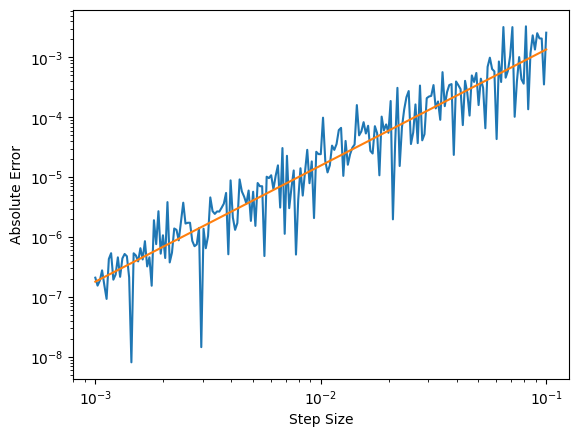

In [ ]:
# Problem 1
def f(x):
  return np.exp(-x) * np.tan(x)

def f2(x): # actual f''
  return np.exp(-x) * (np.tan(x) + (2 / np.cos(x)**2) * (np.tan(x) - 1))

steps = [10.0**(-k/100) for k in range(100,301)]
errors = []

for H in steps:
  x_vals = np.sort(H * np.array([0, np.random.rand(), np.random.rand(), 1]))
  y = np.array([f(x) for x in x_vals])

  h = [x_vals[i] - x_vals[1] for i in range(4)]
  V = np.asmatrix([[h[i]**j for i in range(4)] for j in range(4)])
  coeffs = np.linalg.solve(V, np.array([0,0,2,0]))

  error = abs(f2(x_vals[1]) - coeffs.dot(y))
  errors.append(error.item())

A = np.asmatrix([[np.log(step), 1] for step in steps])
p, C = np.linalg.lstsq(A, np.log(errors))[0]
fit = [np.exp(C)*H**p for H in steps]
print(p, np.exp(C))

plt.loglog(steps, errors)
plt.loglog(steps, fit)
plt.xlabel("Step Size")
plt.ylabel("Absolute Error")
plt.show()

In [ ]:
# Problem 2

In [ ]:
# Problem 3

n = 100

In [ ]:
# Problem 4